In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('train.csv')
df.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489


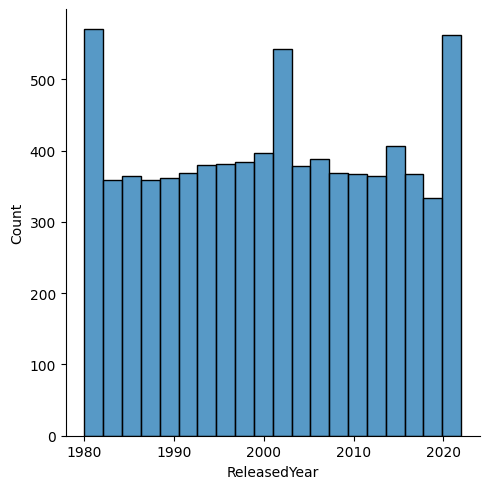

In [18]:
sns.displot(df['ReleasedYear'])

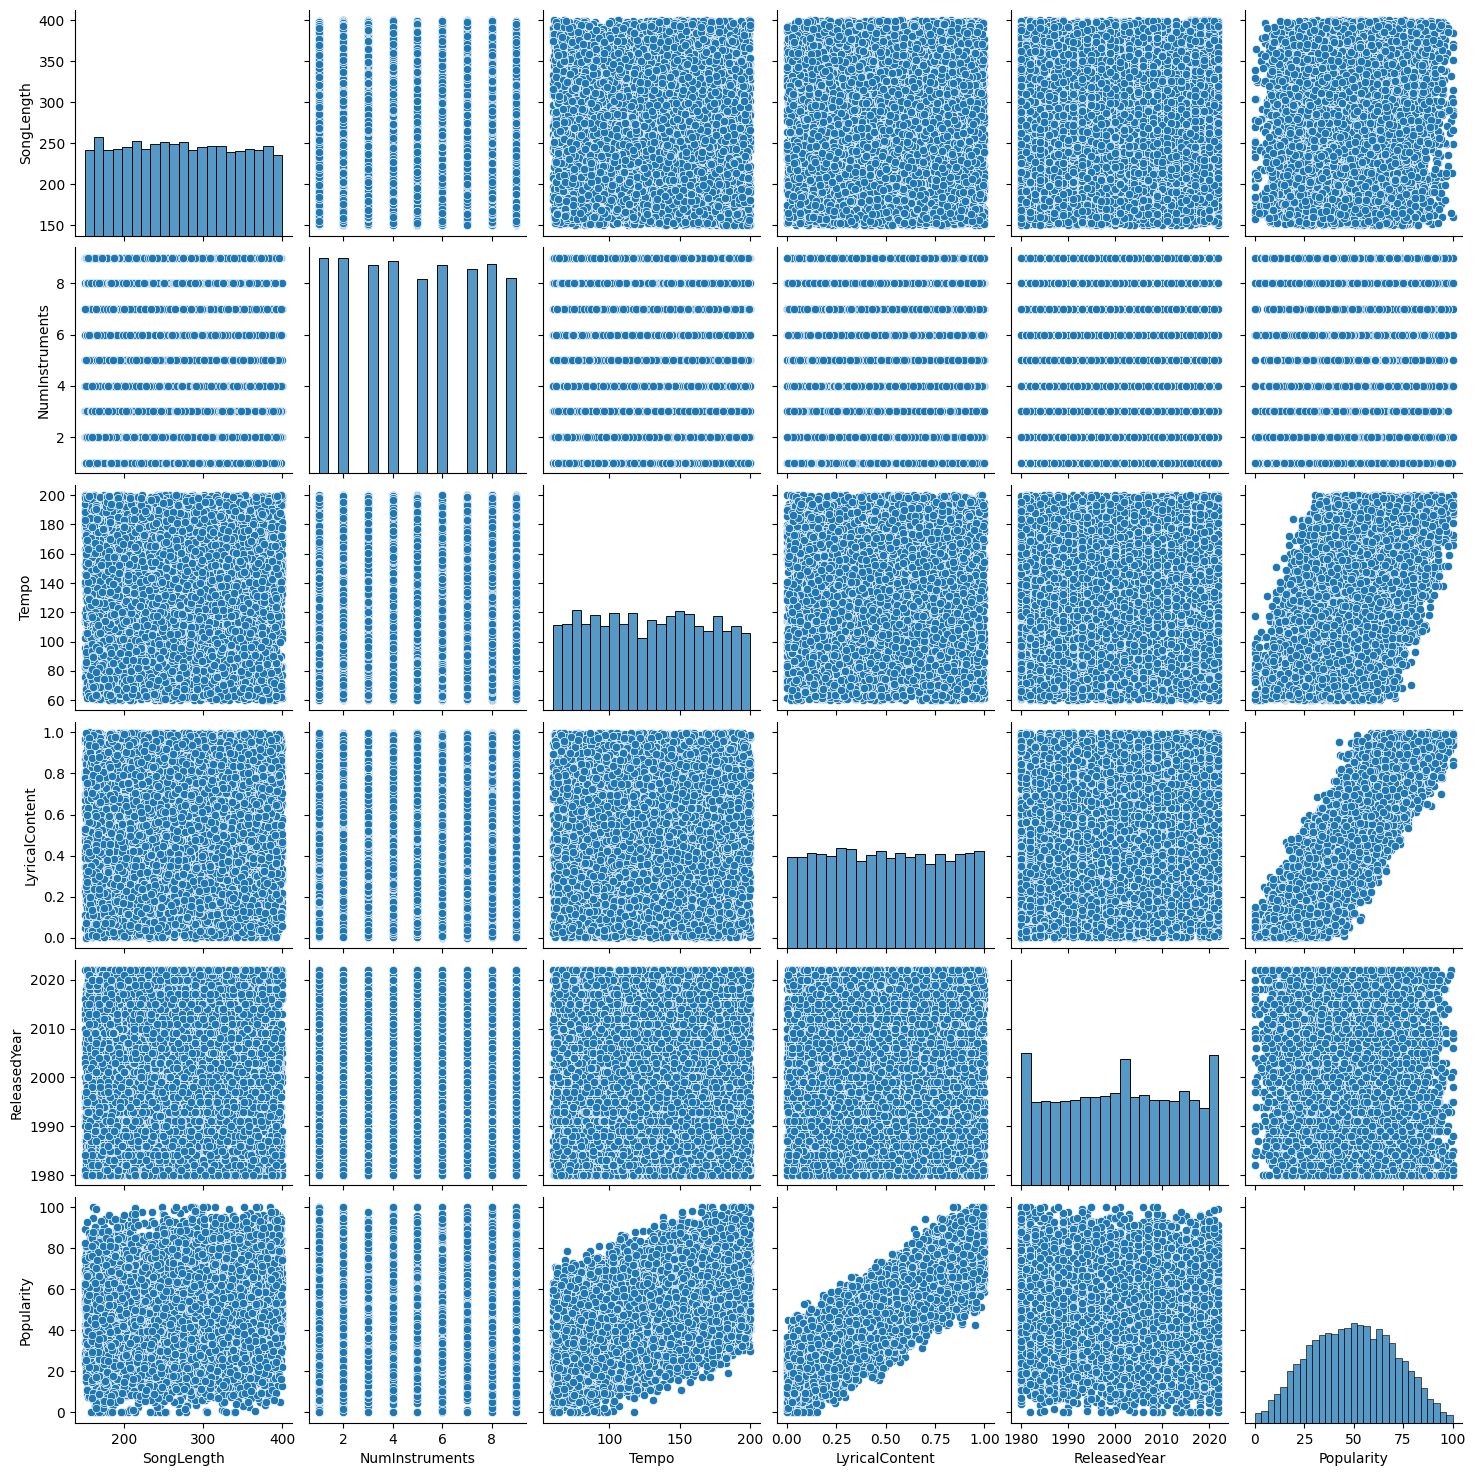

In [19]:
sns.pairplot(df)

/var/folders/_q/9l4jk2p124q2zg7yk0943z9r0000gn/T/ipykernel_39655/3648290514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ReleasedYear'],hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')


<Axes: xlabel='ReleasedYear', ylabel='Density'>

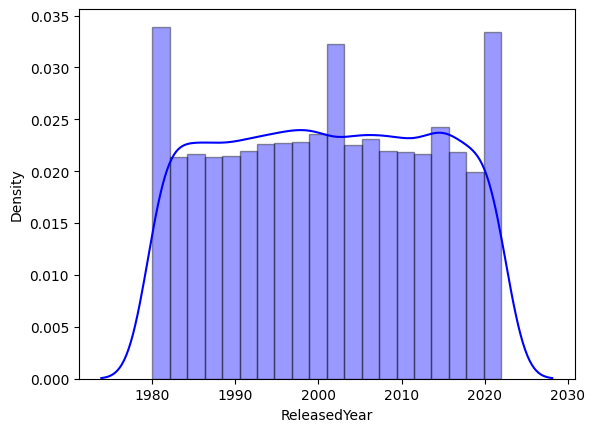

In [20]:
sns.distplot(df['ReleasedYear'],hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')


In [21]:
x=df[['SongLength','NumInstruments','Tempo','LyricalContent','ReleasedYear']]

In [22]:
y=df[['Popularity']]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
lm.intercept_


array([222.99665505])

In [27]:
lm.coef_

array([[ 2.59570939e-02,  3.40612593e-01,  2.46682350e-01,
         6.17500666e+01, -1.22518103e-01]])

In [33]:
cfd = pd.DataFrame(lm.coef_.T, index=x.columns, columns=["Coeff"])
cfd

,Coeff
SongLength,0.025957
NumInstruments,0.340613
Tempo,0.246682
LyricalContent,61.750067
ReleasedYear,-0.122518


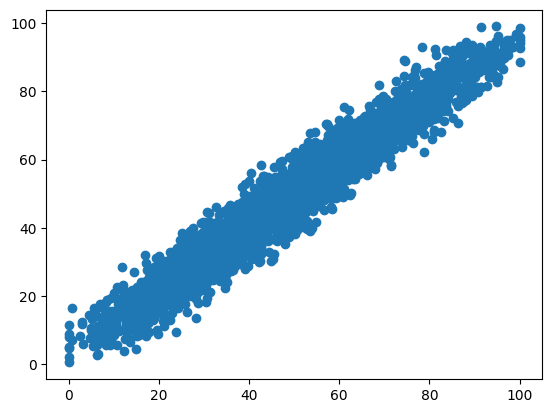

In [34]:
pred=lm.predict(X_test)
plt.scatter(y_test,pred)

In [36]:
# Import root mean square from sklearn
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,pred))
# Check accuracy of the model


25.838694700829915


ValueError: continuous is not supported